# TP &mdash; Restricted Boltzmann Machines

**Auteurs:**

* Javier Andres Boada Martinez
* Kevin Alexandro Sanchez Diaz
* Yevhenii Sielskyi

## Échantillonnage des données

In [1]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

mat = scipy.io.loadmat('binaryalphadigs.mat')

In [2]:
# 26 handwritten letters (A-Z) and 10 digits,
# 39 examples of each class: 
mat['dat'].shape

(36, 39)

In [3]:
mat['dat'][0, 0].shape

(20, 16)

In [4]:
mat['dat'][[0, 1, 2]].shape

(3, 39)

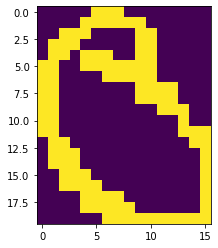

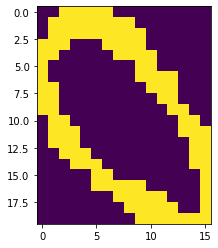

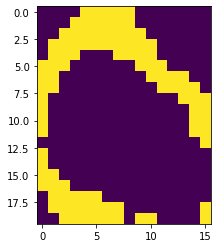

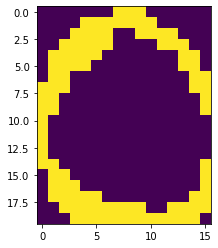

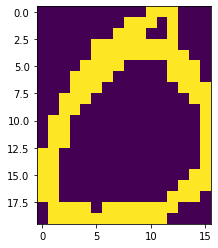

In [5]:
for image in mat['dat'][0, :5]:
    plt.imshow(image)
    plt.show()

In [6]:
def read_alpha_digits(data, indices):
    dataset = []
    
    for idx in indices:
        dataset += [image.reshape(-1) for image in data[idx]]

    return np.array(dataset)

In [7]:
dataset = read_alpha_digits(mat['dat'], [10, 11])

In [8]:
dataset.shape

(78, 320)

## Entraînement

In [9]:
from rbm import RBM

In [10]:
rbm = RBM(dataset.shape[-1], 200)

In [11]:
rbm.train(dataset, lr=.01, epochs=500, batch_size=10)

Epoch 1:
Batch 8: [====================>]. Batch MSE: 0.44258
Epoch average MSE: 0.47095

Epoch 2:
Batch 8: [====================>]. Batch MSE: 0.42031
Epoch average MSE: 0.43148

Epoch 3:
Batch 8: [====================>]. Batch MSE: 0.44453
Epoch average MSE: 0.42822

Epoch 4:
Batch 8: [====================>]. Batch MSE: 0.41133
Epoch average MSE: 0.41817

Epoch 5:
Batch 8: [====================>]. Batch MSE: 0.41289
Epoch average MSE: 0.41259

Epoch 6:
Batch 8: [====================>]. Batch MSE: 0.43398
Epoch average MSE: 0.41835

Epoch 7:
Batch 8: [====================>]. Batch MSE: 0.42344
Epoch average MSE: 0.41660

Epoch 8:
Batch 8: [====================>]. Batch MSE: 0.42773
Epoch average MSE: 0.41761

Epoch 9:
Batch 8: [====================>]. Batch MSE: 0.41016
Epoch average MSE: 0.41986

Epoch 10:
Batch 8: [====================>]. Batch MSE: 0.42656
Epoch average MSE: 0.41262

Epoch 11:
Batch 8: [====================>]. Batch MSE: 0.44414
Epoch average MSE: 0.41438

Epoch 12

In [12]:
test_images = rbm.generate_images(iter_gibbs=100, nb_images=5)

In [13]:
test_images.shape

(5, 20, 16)

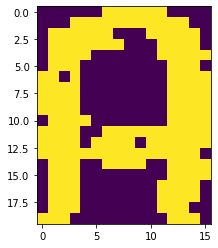

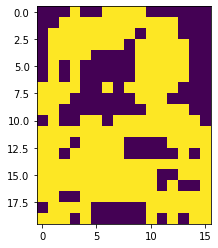

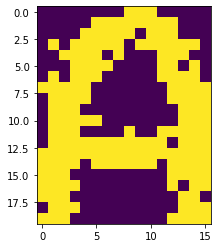

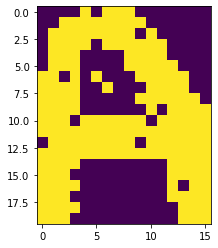

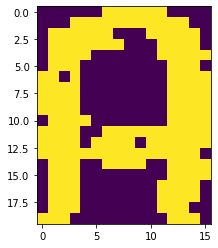

In [14]:
for test_image in test_images:
    plt.imshow(test_image)
    plt.show()